In [30]:
### Import the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist # type: ignore
from tensorflow.math import confusion_matrix # type: ignore

In [31]:
### Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [32]:
type(x_train)

numpy.ndarray

In [33]:
### Check the shape of the data
x_train.shape, y_train.shape, x_test.shape, y_test.shape ### X_train contains 60,000 images of 28x28

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [34]:
x_train[10].shape

(28, 28)

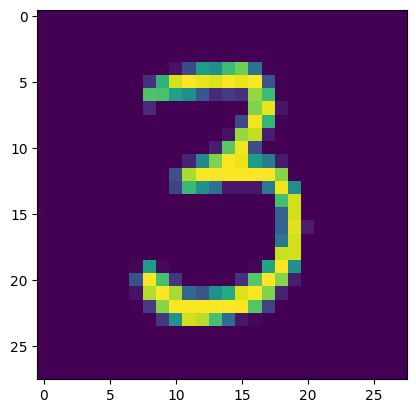

Label:  3


In [35]:
### Displaying the image

plt.imshow(x_train[50])
plt.show()

### Print the label of the image
print("Label: ", y_train[50])

In [36]:
### Unique Image Labels
unique_labels_train = np.unique(y_train)
print("Unique labels in the dataset: ", unique_labels_train)

unique_labels_test = np.unique(y_test)
print("Unique labels in the dataset: ", unique_labels_test)

Unique labels in the dataset:  [0 1 2 3 4 5 6 7 8 9]
Unique labels in the dataset:  [0 1 2 3 4 5 6 7 8 9]


In [37]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [38]:
### Scaling the data

x_train = x_train / 255
x_test = x_test / 255

In [39]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [41]:
### Building the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [42]:
### Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])